# <center>ASTR4004/8004 - Neural Networks - Part 2</center>

This notebook builds a neural network <font color='red'>using exisiting framework such as `pytorch` or `tensorflow`</font>.

We will use dense layers to recognize handwritten digits from the Modified National Institute of Standards and Technology database (i.e., [MNIST dataset](http://yann.lecun.com/exdb/mnist/)), and construct the following architecture for our network (but feel free to explore others!)

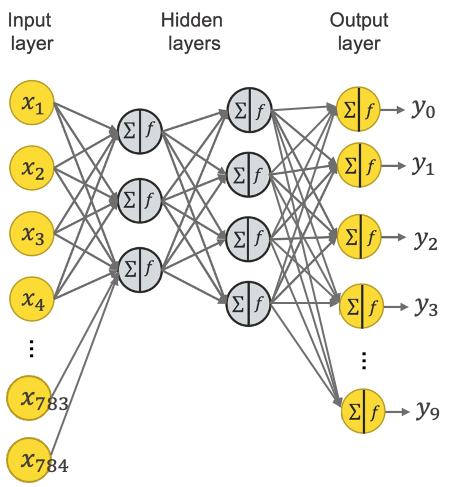



As shown above, the input layer has 784 neurons to fit in all pixels within each 2D image from MNIST, which has a 28x28 pixels.

The output layer has 10 neurons, corresponding to the label being 0, 1, 2, ..., 9. 

The goal is to have only one of the neurons being 1 and this neuron corresponds to the label of the image (i.e., the number of the handwirrent digit). All remain neurons should be 0.

In the middle, let's do only one hidden layer with 64 nodes. 

All neurons are fully connected.

We implement ReLU, sigmoid and softmax activation functions. SGD and Momentum optimizer are available.

Note, we use the softmax activation function in the output layer, since we wish to have probabilities of each class, so that we can measure how well our current forward pass performs.

## Useful packages

In [ ]:
# Let's work within our working directory, e.g., where MNIST data is stored
import os
os.chdir('...')

# We need numpy to handle data and array
import numpy as np

# We need matplotlib.pyplot to make plots
import matplotlib.pyplot as plt

# tensorflow and its keras API provides a NN framework
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, Model

# set hyperparameters at the beginning
l_rate = ...
Nepoch = ...
batch_size = ...

## Dataset preparation
MNIST contains 70,000 images of handwritten digits, in greyscale with pixel-values from 0 to 255. Let us first load the data. I have store them in two seperated numpy files.

In [ ]:
# load data
images = np.load('./MNIST_images.npy', allow_pickle=True)
labels = np.load('./MNIST_labels.npy', allow_pickle=True)

# it is normally a good practice to rescale the training data into [0, 1] or [-1, 1]
images = (images - np.min(images)) / (np.max(images) - np.min(images))

# flatten images into 1D array
x = images.reshape([len(labels), -1])
# create a one-hot encoding of the labels of size 10, i.e., #
# when label is 1, the array is [1, 0, 0, ..., 0]
# when label is 2, the array is [0, 1, 0, ..., 0]
# ...
# when label is 9, the array is [0, 0, 0, ..., 9]
y = np.array(labels.astype('int32')[:, None] == np.arange(10), dtype=np.float32)

### Let's divide the sample into training (90%) and test (10%) 

In [ ]:
train_size = ...
test_size = ...

x_train, x_test = ...
y_train, y_test = ...
images_test, labels_test = ...

print("Training data: {} {}".format(x_train.shape, y_train.shape))
print("Test data: {} {}".format(x_test.shape, y_test.shape))

### It is often a good practice to reshuffle the training set to get rid of any existing pattern in the data

In [ ]:
shuffle_index = np.random.permutation(train_size)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
shuffle_index = np.random.permutation(test_size)
x_test, y_test = x_test[shuffle_index], y_test[shuffle_index]
images_test, labels_test = images_test[shuffle_index], labels_test[shuffle_index]

## Network definition

In [ ]:
model = ...

In [ ]:
# Display the model's architecture
...

### let's visualize how the initial network behaves

In [ ]:
num_col = 8
fig, axes = plt.subplots(2, num_col, figsize=(num_col*2,5))
output = ...

for i in range(num_col):
    ax = axes[1,i]
    ax.imshow(images_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.1,0.1, labels_test[i], va='bottom', ha='left', transform=ax.transAxes, color='r')
    axp = axes[0,i]
    axp.bar(np.arange(10), output[i])
    axp.set_xticks(np.arange(10))
    axp.set_yticks([])
    axp.set_ylim(0,0.8)
axes[0,0].set_ylabel('Probability')

## Network training

In [ ]:
# register the model
...

In [ ]:
# Train the model
...

### Let's view the loss

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(..., label='Train Loss')
ax.plot(..., label='Validation Loss')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(loc='upper right')

### how does the model prediction look now?

In [ ]:
num_col = 8
fig, axes = plt.subplots(2, num_col, figsize=(num_col*2,5))
output = ...

for i in range(num_col):
    ax = axes[1,i]
    ax.imshow(images_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.1,0.1, labels_test[i], va='bottom', ha='left', transform=ax.transAxes, color='r')
    axp = axes[0,i]
    axp.bar(np.arange(10), output[i])
    axp.set_xticks(np.arange(10))
    axp.set_yticks([])
    axp.set_ylim(0,0.8)
axes[0,0].set_ylabel('Probability')

## We can save the model onto disc and use it later 

In [ ]:
# saving the entire model
...
# loading
...

# saving only the architecture ( nno weights or optimizer state)
...
# loading
...

# saving only the weights
...
# load the weights
...

## Let's talk about a couple of tricks

### Dropout
Dropout is a regularization technique that involves randomly "dropping out" (i.e., setting to zero) a fraction of the neurons in a neural network during each training iteration. By doing so, dropout prevents neurons from co-adapting too much to the training data, thereby reducing overfitting and enhancing the network's ability to generalize.



In [ ]:
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),              # Input layer
    ...
    layers.Dense(10, activation='softmax')  # Output layer
])

### EarlyStopping
Early Stopping is a form of regularization used to avoid overfitting when training machine learning models. It involves monitoring the model's performance on a separate validation dataset during the training process and stopping the training once the performance on the validation set ceases to improve for a specified number of consecutive epochs.


In [ ]:
early_stop = ...

### ModelCheckpoint
ModelCheckpoint is a callback function in TensorFlow Keras that allows you to save the state of your model at various stages during training. It can save the entire model (architecture, weights, and optimizer state) or just the model's weights. 

In [ ]:
checkpoint = ...

### ReduceLROnPlateau
ReduceLROnPlateau is a callback function that monitors a specified metric during training and reduces the learning rate by a predefined factor when the metric has ceased to improve for a set number of epochs (patience). This adaptive adjustment helps the model converge more smoothly and avoid getting stuck in local minima, enhancing overall training efficiency and performance.

In [ ]:
reduce_lr = ...

In [ ]:
model.compile(
    ...
)
history = model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=batch_size,
    validation_split=0.2,
    ...
)

### how does the model prediction look now?

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(..., label='Train Loss')
ax.plot(..., label='Validation Loss')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(loc='upper right')
ax.set_ylim(0,1)

## Finally, parallization is so easy in tensorflow including using GPU!

Training/fitting can also use multiple processes to speed up easily with the `use_multiprocessing` and `workers` arguments

In [ ]:
model.fit(x_train, y_train, epochs=2, batch_size=batch_size,
          validation_data=(x_valid, y_valid),
          ...)

If you want to use GPU for `model.fit`, build and compile the model under `tf.device`

<font color='red'>To support GPU in tensorflow, make sure you have install `tensorflow-gpu`</font>


In [ ]:
...

If the data is too big, you might want to split it across multiple devices. You can do so simply by compiling the model inside a `Strategy`

In [ ]:
...

If the model is too big, it can be placed on different devices easily with `tf.device`

In [ ]:
...